# Customer Mall Segmentation:on:
Customer Mall Segmentation with KMeans Clustering is a machine learning project focused on clustering customers based on their shopping behavior using the KMeans algorithm. The project aims to uncover distinct customer segments within a mall's customer base to enable targeted marketing strategies and personalized service## s.

Key Features:

Data Collection: Collect relevant customer data such as demographics, purchase history, and browsing behavior.
Data Preprocessing: Clean and preprocess the data, handling missing values and scaling numerical features if necessary.
Feature Selection: Select relevant features that can help in clustering customers effectively.
KMeans Clustering: Apply the KMeans algorithm to cluster customers into distinct segments based on their feature similarity.
Optimal Cluster Selection: Use methods like the elbow method or silhouette score to determine the optimal number of clusters.
Segment Analysis: Analyze each cluster to understand the characteristics and shopping behaviors of customers within that cluster.
Visualization: Visualize the clusters to gain insights and present findings to stakeholders effectively.
Implementation: Implement targeted marketing campaigns or personalized services based on the identified cust
## Outcome:
The Customer Mall Segmentation project using KMeans Clustering aims to provide actionable insights to mall management, enabling them to make data-driven decisions to improve customer satisfaction, drive sales, and maximize the mall's overall profitability

### Purpose of this project:
Like I always say to get better at what I do, and Make my self well know in the filled of machine learning and a.i in genrall, now I am getting closer and closer to understanding the a.i and why it is important, at the start of this journy " I started it as a necessary thing to do and now I am loving..... it." and I hope This love last and reach a happy ending, so pray for it too, " THANK YOU FOR YOUR TIME "..all's overall profitability.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.Gender.describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [5]:
df.drop(columns='CustomerID', inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


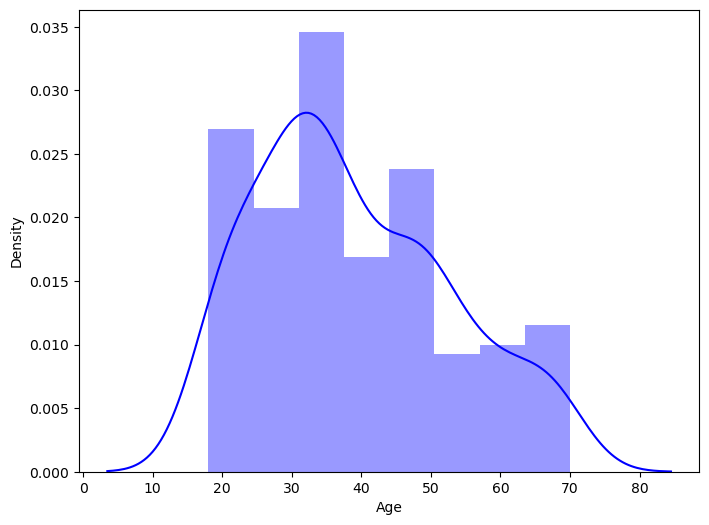

In [6]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'], color='blue')
plt.xlabel('Age')
plt.show()

In [7]:
df['Gender'] = df['Gender'].astype('category')

In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


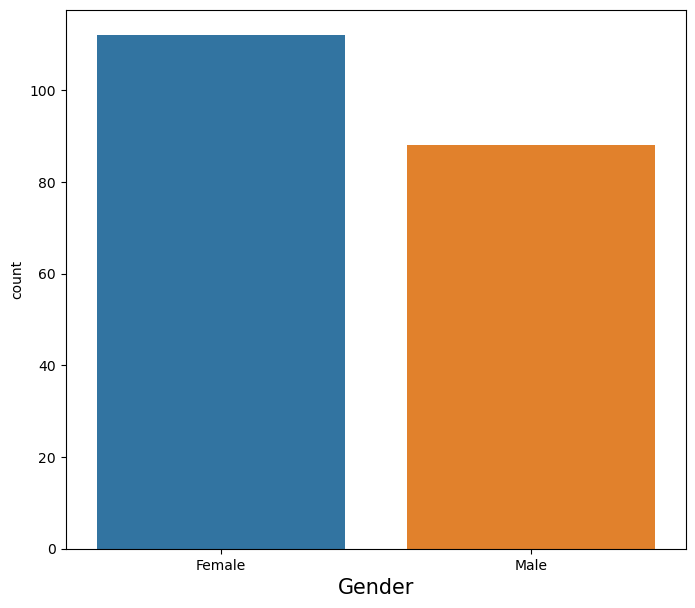

In [8]:
plt.figure(figsize=(8,7))
sns.countplot(x=df["Gender"])
plt.xlabel("Gender",fontsize=15)
plt.show()

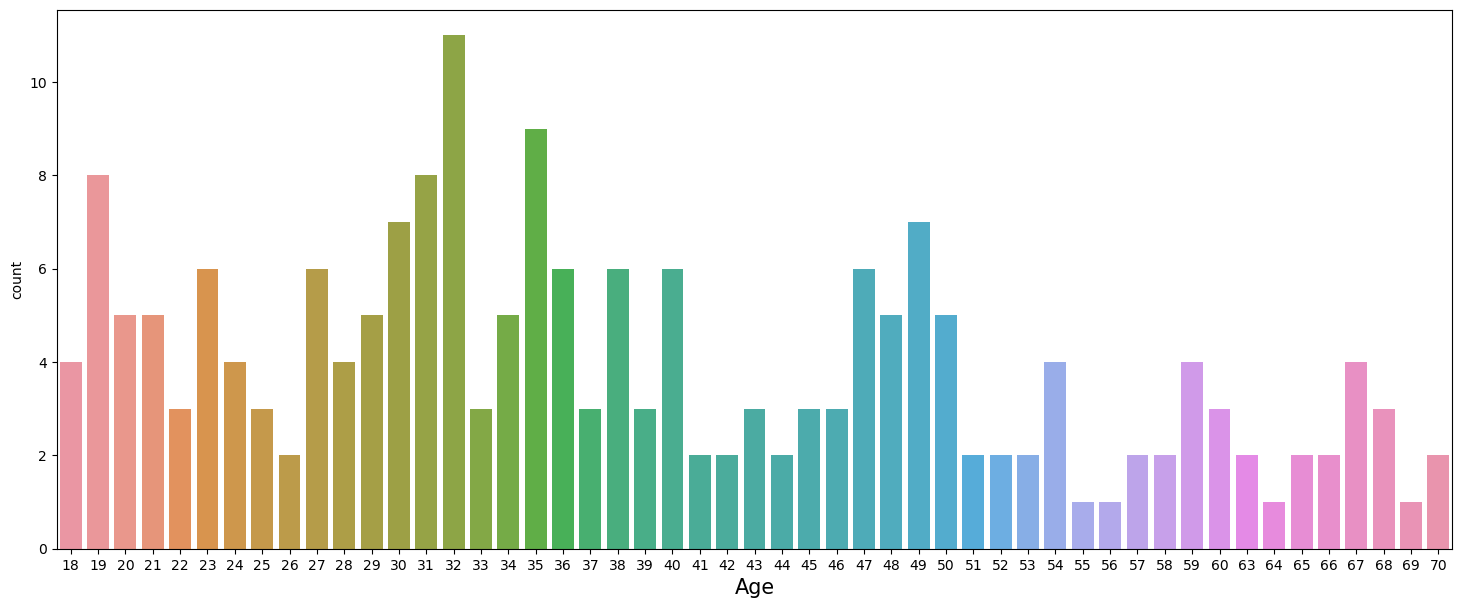

In [35]:
plt.figure(figsize=(18,7))
sns.countplot(x=df["Age"])
plt.xlabel("Age",fontsize=15)
plt.show()

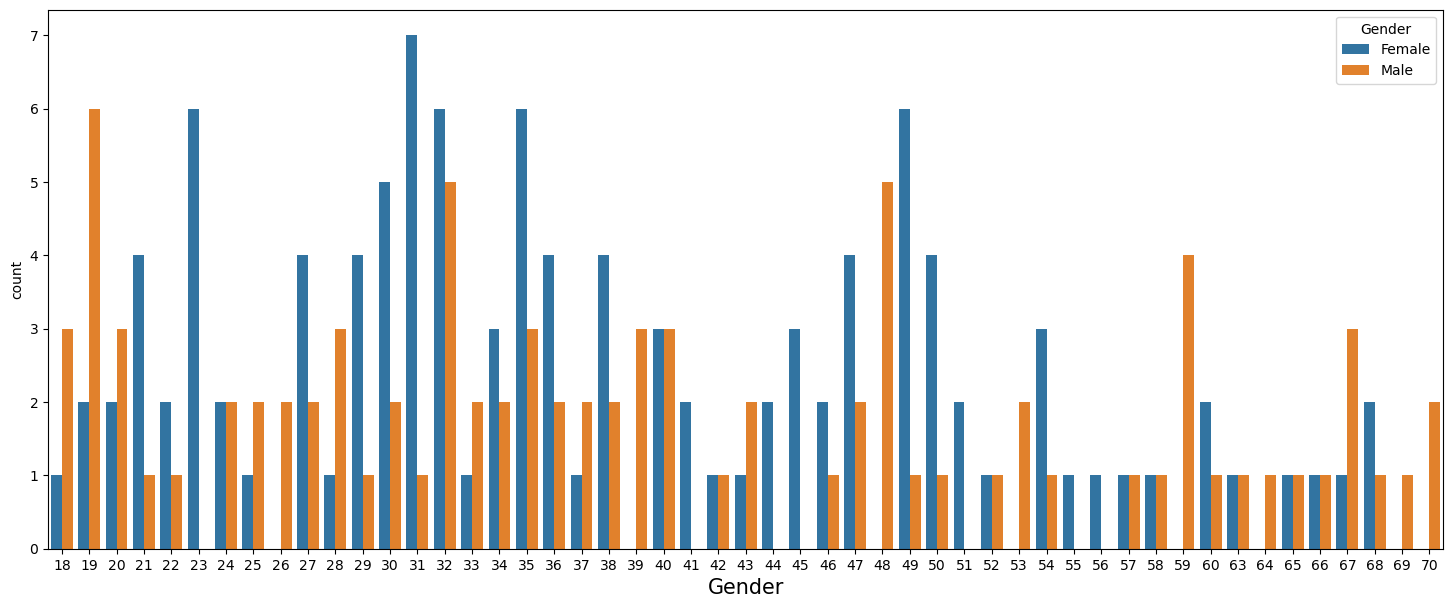

In [10]:
plt.figure(figsize=(18,7))
sns.countplot(x=df["Age"], hue = 'Gender', data=df)
plt.xlabel("Gender",fontsize=15)
plt.show()

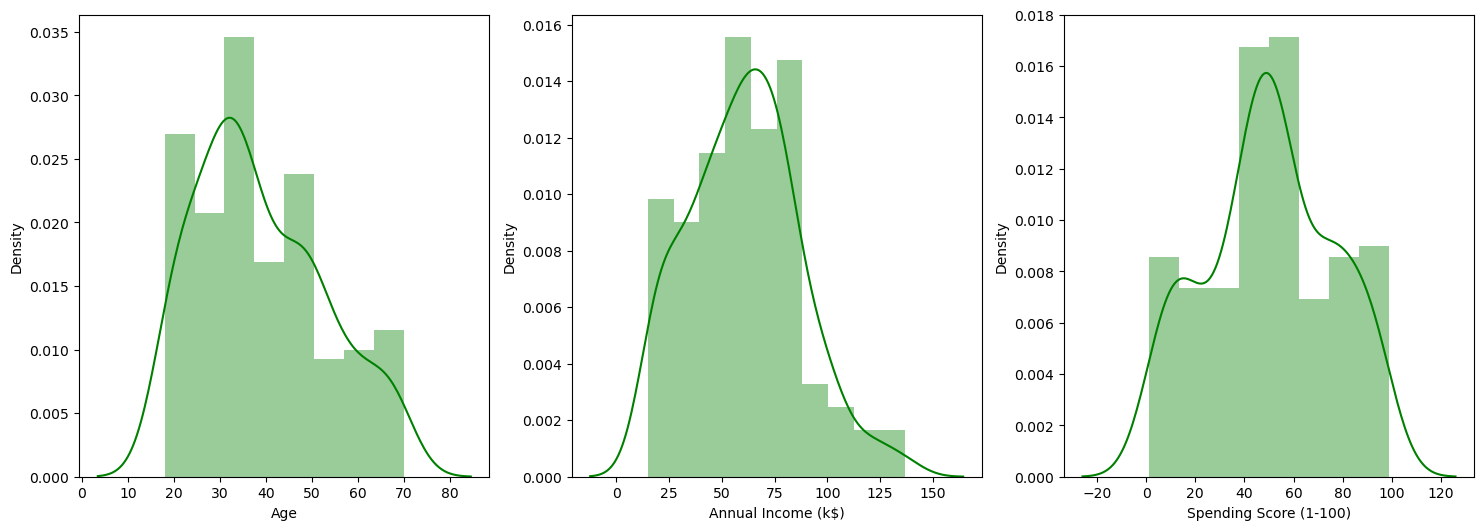

In [11]:
plt.figure(figsize=(18,6))
plotnumber = 1
for i in df.iloc[:,1:]:
    if plotnumber <=8:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df[i], color='green')
        plt.xlabel(i)
    plotnumber +=1
plt.show()

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [14]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [15]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
df_k = df.iloc[:,[2,3]].values

In [19]:
print(df_k)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

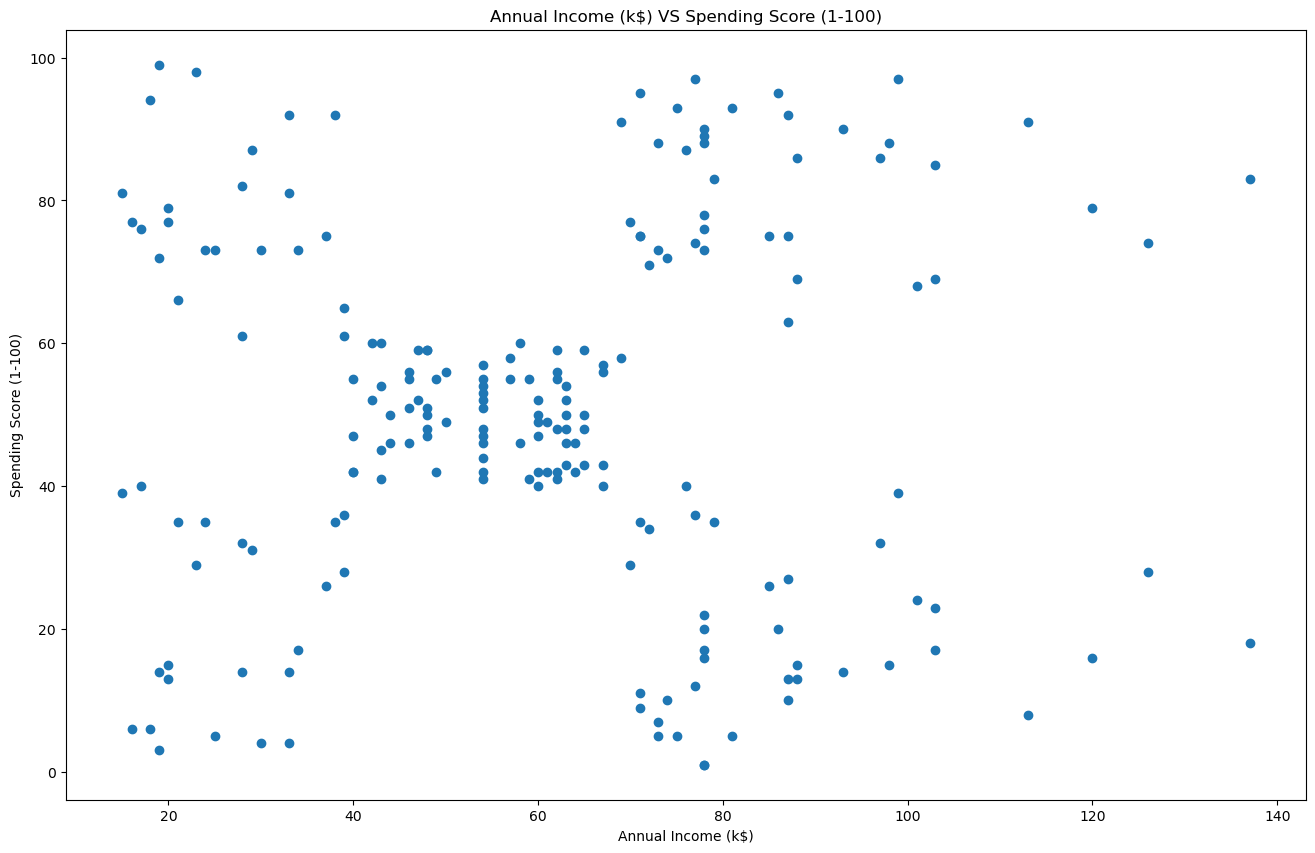

In [20]:
plt.figure(figsize=(16,10))
plt.scatter(df_k[:,0], df_k[:,1], cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) VS Spending Score (1-100)")
plt.show()

In [21]:
!pip install --upgrade threadpoolctl
!pip install --upgrade scikit-learn

In [22]:
km = KMeans(n_clusters=2)
km.fit(df_k)
print(km.cluster_centers_)

[[52.35031847 57.06369427]
 [90.53488372 25.13953488]]


In [23]:
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1]


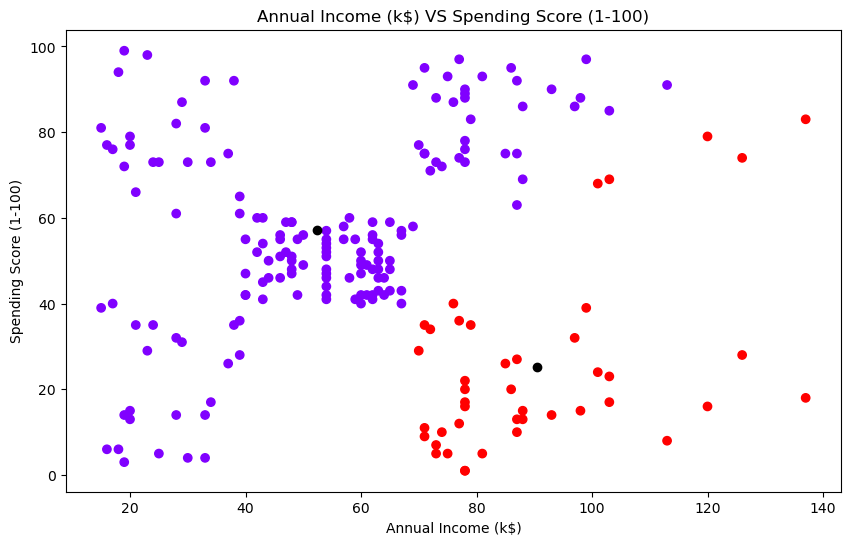

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df_k[:,0], df_k[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) VS Spending Score (1-100)")
plt.show()

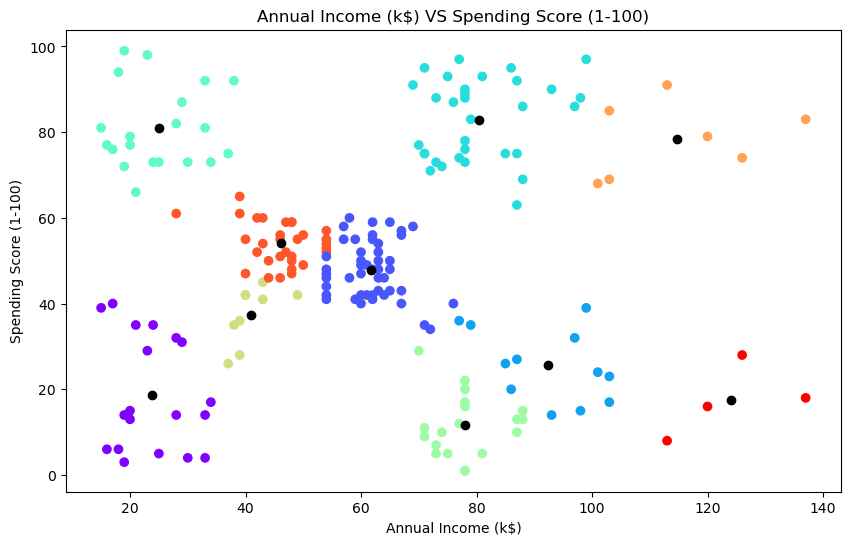

In [28]:
plt.figure(figsize=(10,6))

km = KMeans(n_clusters=10)
km.fit(df_k)

plt.scatter(df_k[:,0], df_k[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) VS Spending Score (1-100)")
plt.show()

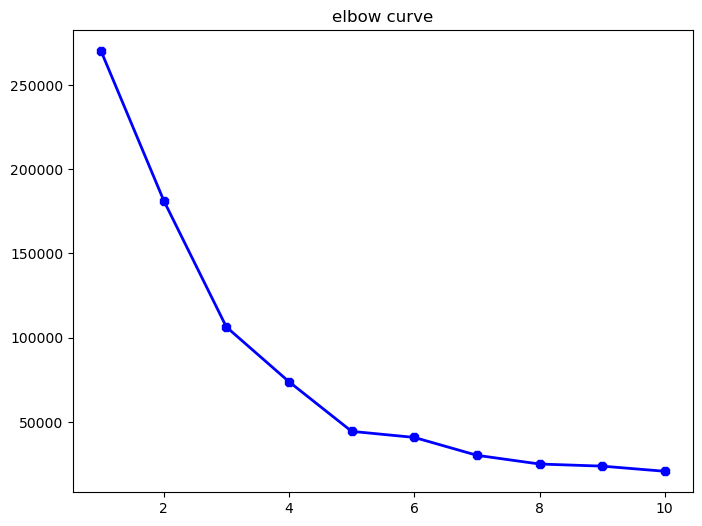

In [31]:
plt.figure(figsize=(8,6))

wcss = []

for i in range(1,11):
    km  = KMeans(n_clusters=i)
    km.fit(df_k)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss, linewidth=2, color='blue', marker='8')
plt.title('elbow curve')
plt.show()

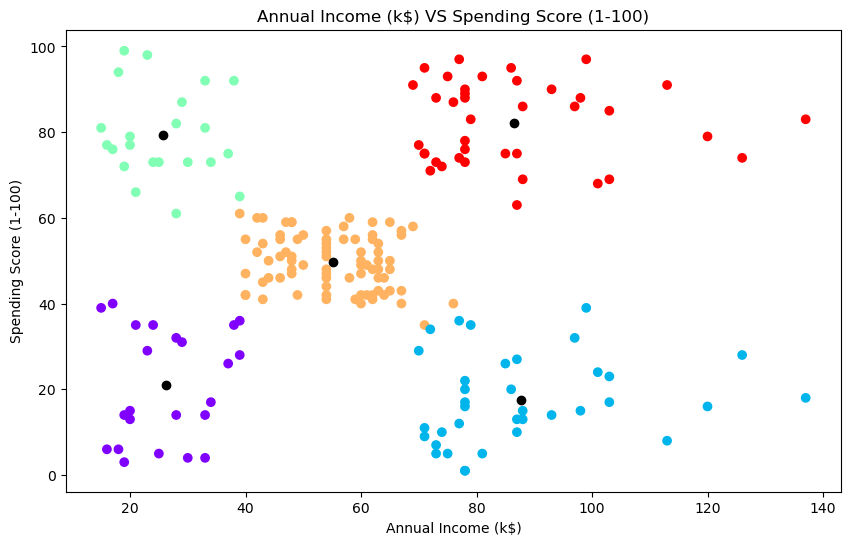

In [32]:
plt.figure(figsize=(10,6))

km = KMeans(n_clusters=5)
km.fit(df_k)

plt.scatter(df_k[:,0], df_k[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) VS Spending Score (1-100)")
plt.show()